In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("iris.data", sep=',',header = None)
x = df.drop([4],axis=1).values

In [3]:
scaler = StandardScaler()
scaler.fit(x)
features = pd.DataFrame(scaler.transform(x))
y=df[4].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
data = pd.concat([principalDf, df[[4]]], axis = 1)
data.rename(columns={4 : 'Target'},inplace=True)
data.head()


,principal component 1,principal component 2,Target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


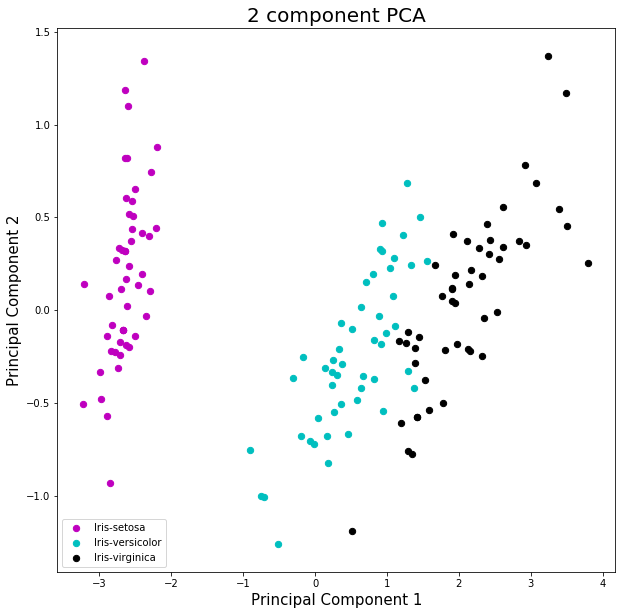

In [9]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['m', 'c', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = data['Target'] == target
    ax.scatter(data.loc[indicesToKeep, 'principal component 1'],data.loc[indicesToKeep, 'principal component 2'],c = color,s = 40)
ax.legend(targets)
plt.show()

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

newdf = pd.DataFrame(data = tsne_results,columns = ['principal component 1', 'principal component 2'])
tdata = pd.concat([newdf, df[[4]]], axis = 1)
tdata.rename(columns={4 : 'Target'},inplace=True)
tdata.head()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.165s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.669058
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.048214
[t-SNE] KL divergence after 300 iterations: 0.087667


,principal component 1,principal component 2,Target
0,-13.238913,6.125152,Iris-setosa
1,-11.918388,6.700612,Iris-setosa
2,-12.686653,7.362312,Iris-setosa
3,-12.260602,7.407969,Iris-setosa
4,-13.355798,6.130264,Iris-setosa


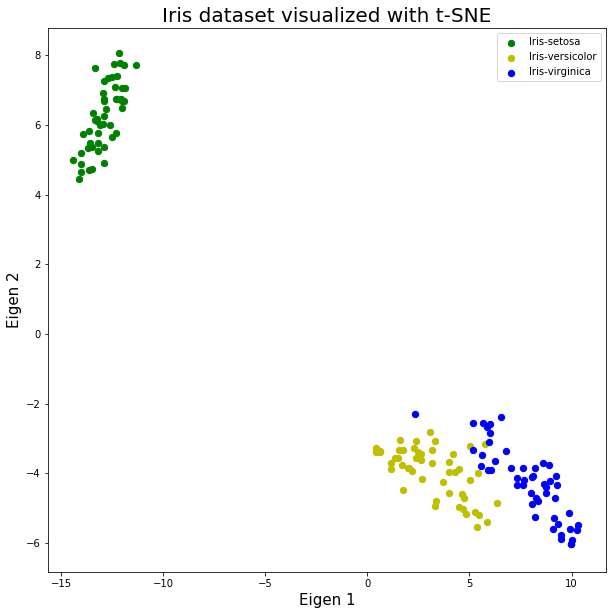

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Eigen 1', fontsize = 15)
ax.set_ylabel('Eigen 2', fontsize = 15)
ax.set_title('Iris dataset visualized with t-SNE', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['g', 'y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = tdata['Target'] == target
    ax.scatter(tdata.loc[indicesToKeep, 'principal component 1'],tdata.loc[indicesToKeep, 'principal component 2'],c = color,s = 40)
ax.legend(targets)


In [96]:
from sklearn.datasets.samples_generator import make_swiss_roll
a  = make_swiss_roll(n_samples=100, noise=0.0, random_state=None)
bf = pd.DataFrame(a[0],columns = ['Col1', 'Col2','Col3'] )
cf = pd.DataFrame(a[1],columns = ['Target'])
df = bf.join(cf)
print(df)
mean = df['Target'].mean()
print(mean)
df['Target'].values[df['Target'] < mean] = 0
df['Target'].values[df['Target'] >= mean] = 1
y = df['Target'].values
x = df.drop(['Target'],axis=1).values
df = pd.DataFrame(df)

         Col1       Col2       Col3     Target
0   11.124336   6.855682  -4.891159  12.152131
1   -3.339468   7.035147   7.565409   8.269671
2    5.049380  15.832977  -2.804902   5.776134
3    5.241829  20.356192  -2.552103   5.830095
4    0.091918   8.563663   7.841722   7.842261
5   12.343594   7.254944   3.562228  12.847326
6    5.959685   3.738082  12.320971  13.686642
7    3.741897  12.885562 -10.696474  11.332093
8   12.601613   9.939652   0.667070  12.619257
9   -9.006201   8.923911   1.939482   9.212668
10   3.532015  20.907546   6.449057   7.352922
11   1.930970  13.384584 -11.001148  11.169329
12   9.886557  15.085845  -6.744072  11.967728
13   6.109812   6.964719  -0.768876   6.158000
14   4.176559  16.065229  -3.672956   5.561857
15  -9.465024  18.486398  -0.512824   9.478906
16   2.925395  17.269673  -4.416421   5.297425
17   4.963467  12.278379 -10.311803  11.444181
18   2.894116   1.545430  -4.429470   5.291135
19  -0.938628   0.943783   7.916546   7.971996
20   1.539469

In [97]:
scaler = StandardScaler()
scaler.fit(x)
features = pd.DataFrame(scaler.transform(x))
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
data = pd.concat([principalDf, df[['Target']]], axis = 1)
data.head()


,principal component 1,principal component 2,Target
0,-10.379794,1.570267,1.0
1,7.185483,7.027171,0.0
2,-3.866706,-4.415244,0.0
3,-3.927008,-7.288175,0.0
4,4.015995,6.913740,0.0


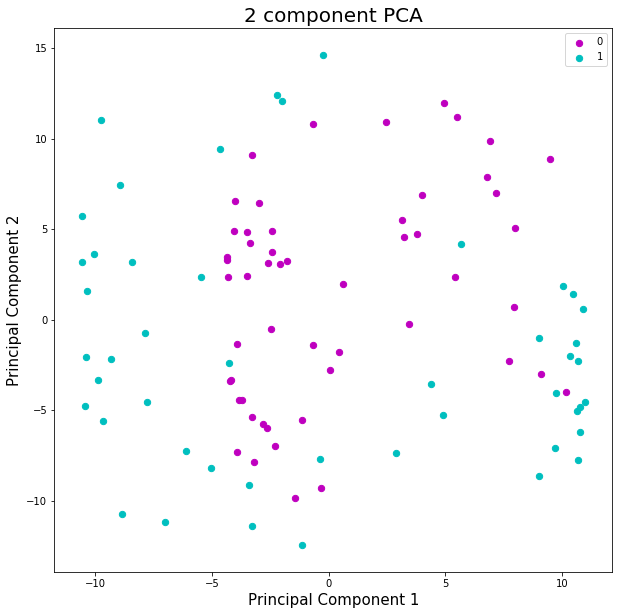

In [98]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['m', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = data['Target'] == target
    ax.scatter(data.loc[indicesToKeep, 'principal component 1'],data.loc[indicesToKeep, 'principal component 2'],c = color,s = 40)
ax.legend(targets)
plt.show()

In [99]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

newdf = pd.DataFrame(data = tsne_results,columns = ['principal component 1', 'principal component 2'])
tdata = pd.concat([newdf, df[['Target']]], axis = 1)
tdata.head()

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 8.015266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.687046
[t-SNE] KL divergence after 300 iterations: 0.741573


,principal component 1,principal component 2,Target
0,1.484475,2.139593,1.0
1,-8.561112,-5.584889,0.0
2,9.065752,2.133733,0.0
3,10.208540,0.105620,0.0
4,-7.191954,-0.863099,0.0


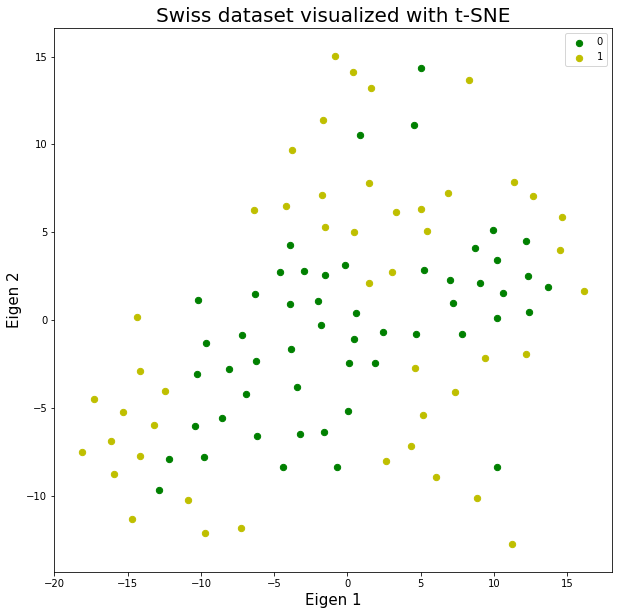

In [100]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Eigen 1', fontsize = 15)
ax.set_ylabel('Eigen 2', fontsize = 15)
ax.set_title('Swiss dataset visualized with t-SNE', fontsize = 20)
targets = [0,1]
colors = ['g', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = tdata['Target'] == target
    ax.scatter(tdata.loc[indicesToKeep, 'principal component 1'],tdata.loc[indicesToKeep, 'principal component 2'],c = color,s = 40)
ax.legend(targets)


### Swiss Roll data is very disperse data